In [28]:
import scipy
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import numpy as np

from scipy.stats import bootstrap

import matplotlib.pyplot as plt

## load data
- http://rasbt.github.io/mlxtend/user_guide/data/boston_housing_data/#boston_housing_data-the-boston-housing-dataset-for-regression

In [29]:
np.random.seed(1)
tf.random.set_seed(1)


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)


## Linear Regression

In [30]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.492698146979513
R2 score is 0.76




In [31]:
pred_error_lr = y_train_predict - y_train

### mean prediction error

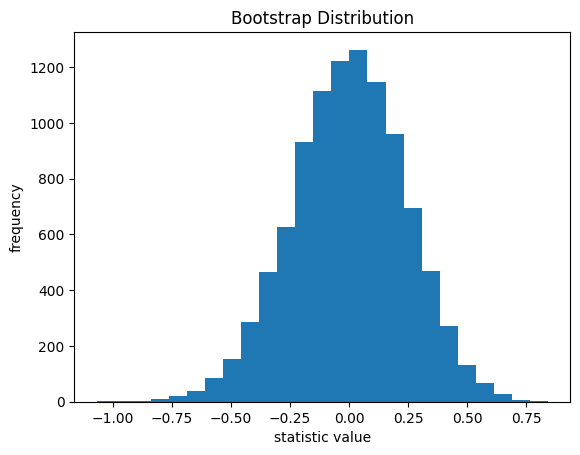

In [32]:
rng = np.random.default_rng()

data = (pred_error_lr,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

### bias and variance decomposition

- on training dataset

In [34]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg_lr, X_train, y_train, X_train, y_train, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 21.399
Average bias: 20.196
Average variance: 1.203


- on testing dataset

In [33]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg_lr, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 29.891
Average bias: 28.609
Average variance: 1.282
